In [1]:
from joblib import dump
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential#type:ignore
from tensorflow.keras.layers import Dense#type:ignore
from tensorflow.keras import regularizers#type:ignore
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")
df = shuffle(df, random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,pus_filled_pimples,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4915,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4344,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3554,Heart attack,vomiting,breathlessness,sweating,chest_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,hepatitis A,joint_pain,vomiting,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,pus filled pimples,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4915,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4344,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3554,Heart attack,vomiting,breathlessness,sweating,chest pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,hepatitis A,joint pain,vomiting,yellowish skin,dark urine,nausea,loss of appetite,abdominal pain,diarrhoea,mild fever,yellowing of eyes,muscle pain,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4919,4919,4919,4919,4571,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1205
Symptom_6    1985
Symptom_7    2651
Symptom_8    2975
Symptom_9    3227
Symptom_10   3407
Symptom_11   3725
Symptom_12   4175
Symptom_13   4415
Symptom_14   4613
Symptom_15   4679
Symptom_16   4727
Symptom_17   4847


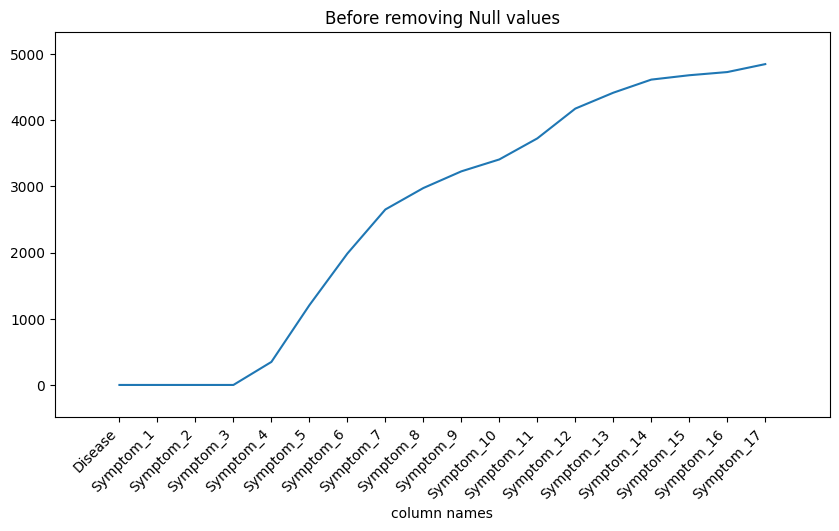

In [6]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [7]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,pus filled pimples,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Heart attack,vomiting,breathlessness,sweating,chest pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hepatitis A,joint pain,vomiting,yellowish skin,dark urine,nausea,loss of appetite,abdominal pain,diarrhoea,mild fever,yellowing of eyes,muscle pain,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,pus filled pimples,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,0,0,0,0,0,0,0,0,0,0,0,0
3,Heart attack,vomiting,breathlessness,sweating,chest pain,0,0,0,0,0,0,0,0,0,0,0,0,0
4,hepatitis A,joint pain,vomiting,yellowish skin,dark urine,nausea,loss of appetite,abdominal pain,diarrhoea,mild fever,yellowing of eyes,muscle pain,0,0,0,0,0,0


In [9]:
df1 = pd.read_csv('Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [10]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [11]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d.head(20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Impetigo,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
3,Heart attack,5,4,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0
4,hepatitis A,3,5,3,4,5,4,4,6,5,4,2,0,0,0,0,0,0
5,Hypertension,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Gastroenteritis,5,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Arthritis,2,4,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0
8,Peptic ulcer diseae,5,5,4,4,5,4,0,0,0,0,0,0,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [12]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(20)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10828\1341861434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('dischromic  patches', 0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10828\1341861434.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('spotting  urination',0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10828\1341861434.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Impetigo,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
3,Heart attack,5,4,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0
4,hepatitis A,3,5,3,4,5,4,4,6,5,4,2,0,0,0,0,0,0
5,Hypertension,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Gastroenteritis,5,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Arthritis,2,4,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0
8,Peptic ulcer diseae,5,5,4,4,5,4,0,0,0,0,0,0,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [13]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


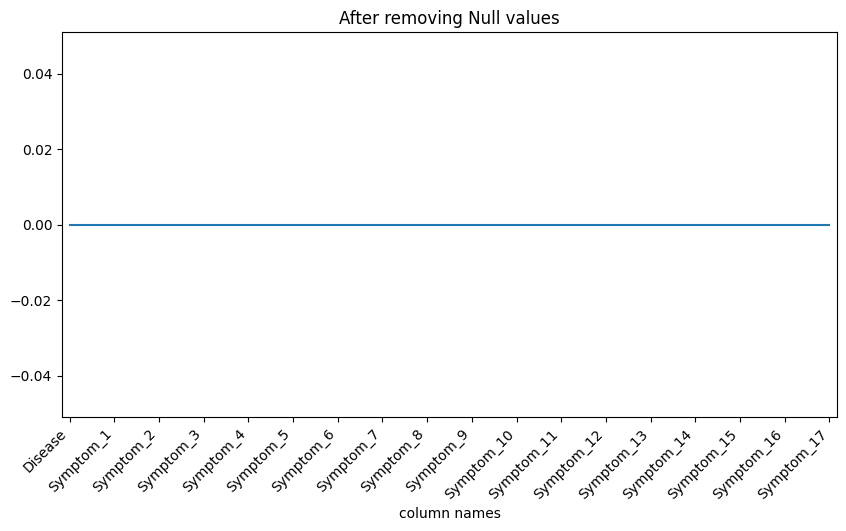

In [14]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [15]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [16]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)

In [18]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3935, 17) (984, 17) (3935,) (984,)


In [19]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


In [20]:
ann_model = Sequential()
ann_model.add(tf.keras.Input(shape=(x_train.shape[1],)))
ann_model.add(Dense(units=100, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann_model.add(Dense(units=50, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann_model.add(Dense(units=len(df['Disease'].unique()), activation='softmax',kernel_regularizer=regularizers.l2(0.0001)))

In [21]:
ann_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
label_encoder = LabelEncoder()

# Encode categorical variables
for col in range(x_train.shape[1]):
    if isinstance(x_train[0, col], str):
        x_train[:, col] = label_encoder.fit_transform(x_train[:, col])
        x_test[:, col] = label_encoder.transform(x_test[:, col])

In [23]:
label_encoder.fit(df['Disease'].unique())
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [24]:
ann_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1265 - loss: 3.4498 - val_accuracy: 0.4028 - val_loss: 2.2993
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5310 - loss: 1.8972 - val_accuracy: 0.6277 - val_loss: 1.3842
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7229 - loss: 1.1403 - val_accuracy: 0.7992 - val_loss: 0.9646
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8137 - loss: 0.8055 - val_accuracy: 0.8577 - val_loss: 0.7543
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8522 - loss: 0.6324 - val_accuracy: 0.8653 - val_loss: 0.6297
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8866 - loss: 0.5048 - val_accuracy: 0.8742 - val_loss: 0.5403
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8939 - loss: 0.4563 - val_accuracy: 0.8945 - val_loss: 0.4962
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.9100 - loss: 0.3780 - val_accuracy: 0.9085 - val_l

In [25]:
pred_probs = ann_model.predict(x_test)
preds = np.argmax(pred_probs, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


F1-score% = 98.04617591539801 | Accuracy% = 98.06910569105692


<Axes: >

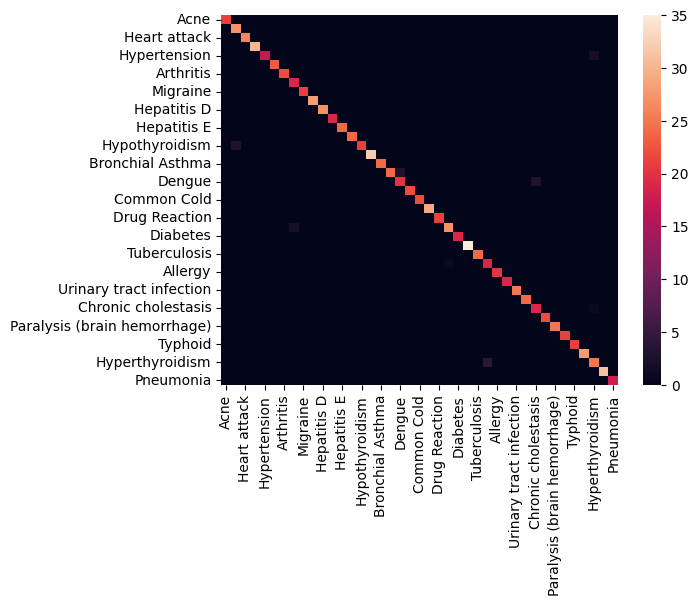

In [26]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro') * 100, '|', 'Accuracy% =', accuracy_score(y_test, preds) * 100)
sns.heatmap(df_cm)

In [27]:
def predict_single(symptoms_list):
    # Create a DataFrame from the input symptoms
    input_data = pd.DataFrame([symptoms_list], columns=symptoms_list)
    
    # Convert input symptoms to weights using the symptom severity CSV
    encoded_input = []
    for symptom in symptoms_list:
        if symptom in df1['Symptom'].values:
            encoded_input.append(df1[df1['Symptom'] == symptom]['weight'].values[0])
        else:
            encoded_input.append(0)  # If symptom is not found, treat it as zero
    
    # Convert the list to a numpy array (similar to the input data shape)
    input_array = np.array(encoded_input).reshape(1, -1)
    
    # Pad the input array to match the number of columns in the training set (if needed)
    if input_array.shape[1] < x_train.shape[1]:
        padded_input = np.zeros((1, x_train.shape[1]))
        padded_input[:, :input_array.shape[1]] = input_array
    else:
        padded_input = input_array

    # Predict the disease
    prediction_probs = ann_model.predict(padded_input)
    predicted_class = np.argmax(prediction_probs, axis=1)
    predicted_disease = label_encoder.inverse_transform(predicted_class)[0]
    
    return predicted_disease

In [28]:
symptoms = ['stomach pain', 'acidity', 'ulcers on tongue', 'vomiting', 'cough', 'chest pain']

In [29]:
symptom=['shivering', 'chills', 'watering from eyes']

In [30]:
symptomss = ['vomiting', 'yellowish skin', 'abdominal pain', 'swelling of stomach', 'distention of abdomen', 'history of alcohol consumption', 'fluid overload']


In [31]:
predicted_disease = predict_single(symptomss)
print(f"Predicted Disease: {predicted_disease}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Disease: Alcoholic hepatitis


In [32]:
def gradio_predict(*symptoms):
    symptom_list = list(symptoms)
    return predict_single(symptom_list)

In [ ]:
import gradio as gr
inputs = [gr.Textbox(placeholder="Symptom", label=f"Symptom {i+1}") for i in range(17)]

interface = gr.Interface(
    fn=gradio_predict,
    inputs=inputs,
    outputs="text",
    title="Disease Prediction Based on Symptoms",
    description="Enter symptoms to predict the most likely disease. Each input field can accept one symptom."
)

# Launch the Gradio interface
interface.launch()

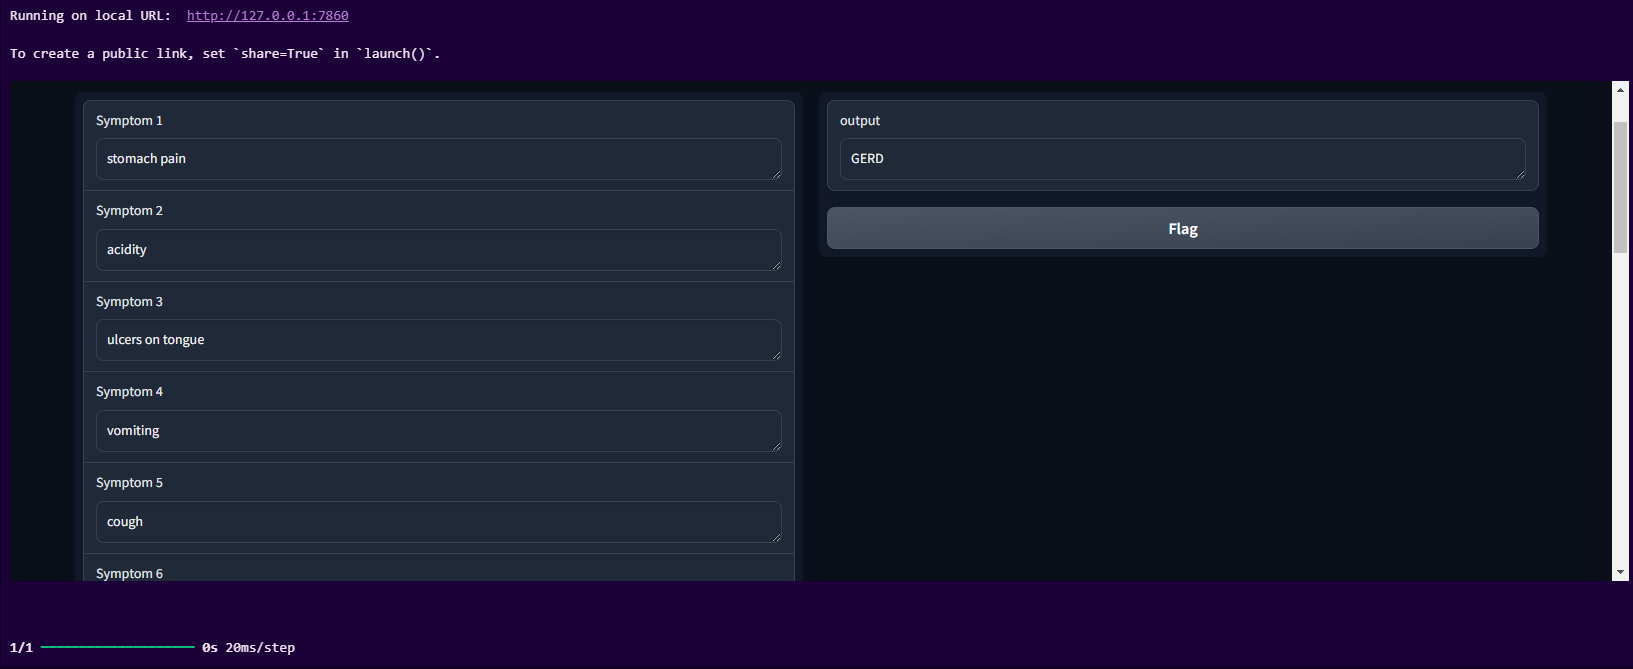